In [3]:
###############################################################################
##  Curso : Metodos Estadistico
##  Sesion : 11
##  Tema : Pruebas No Parametricas
###############################################################################

# Define path file
FILE_URL <- "https://raw.githubusercontent.com/jgomezz/MsEstadAplic_MetodosEstadisticos/master/data/metodos_estadisticos/semana-11/ANSI/Mc_Nemar.csv"
FILE_ENCONDING <- "ISO-8859-1"

# Read file
Depre.data <- read.csv(FILE_URL, fileEncoding = FILE_ENCONDING)
#
head(Depre.data)

Antes,Después
1,1
1,1
1,1
1,1
2,1
2,1


In [5]:
#
# ENUNCIADO : 9. Si en el distrito de Comas, el monto mediano de pago de impuesto
#                predial y arbitrios en el 2014 es menor al monto mediano de pago de
#                impuesto predial y arbitrios en el 2015.

###############################################################################
#                        Prueba de Mc Nemar
###############################################################################
mcnemar.test(Depre.data[,"Antes"], Depre.data[,"Después"])

#  EL valor p-value = 0.04331 no es ajustado, no es el correcto


	McNemar's Chi-squared test with continuity correction

data:  Depre.data[, "Antes"] and Depre.data[, "Después"]
McNemar's chi-squared = 4.0833, df = 1, p-value = 0.04331


In [6]:
# cargo las librerias
install.packages("exact2x2")
library(exact2x2)

# Calculo la prueba de Mc Nemar corregida
mcnemar.exact(Depre.data[,"Antes"], Depre.data[,"Después"])


also installing the dependencies ‘exactci’, ‘ssanv’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: exactci
Loading required package: ssanv



	Exact McNemar test (with central confidence intervals)

data:  Depre.data[, "Antes"] and Depre.data[, "Después"]
b = 2, c = 10, p-value = 0.03857
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.02130704 0.93850199
sample estimates:
odds ratio 
       0.2 


In [8]:
# EL p-value = 0.03857 es el correcto
#
# Prueba de Hipotesis
#
#    1)  
#      H0:  El tratamiento no ha sido efectivo
#      H1 : EL tratamiento ha sido efectivo
#
#    2) alfa = 0.05
#
#    3) p-valor = 0.03857 < alfa , se rechaza H0
#
#    4) Conclusión: A un alfa = 0.05 , se puede afirmar que la frecuencia de depresión ha variado

In [7]:
###############################################################################
#                        lectura de datos de la Municipalidad
###############################################################################FILE2_URL <- "https://raw.githubusercontent.com/jgomezz/MsEstadAplic_MetodosEstadisticos/master/data/metodos_estadisticos/semana-11/ANSI/Caso_D.csv"
FILE2_ENCONDING <- "ISO-8859-1"

# Read file
Muni.data <- read.csv(FILE2_URL, fileEncoding = FILE2_ENCONDING)
#
head(Muni.data)

Distrito,Género,Pago.2014,Pago.2015,Robos,Atención,Opinión
Comas,Femenino,148.0,167.3,8,46.2,Muy Buena
Comas,Femenino,159.4,163.8,2,33.3,Excelente
Comas,Femenino,151.4,158.6,8,13.7,Pésima
Comas,Masculino,145.1,160.1,5,6.0,Excelente
Comas,Femenino,147.0,158.4,8,16.1,Pésima
Comas,Masculino,145.2,161.6,12,18.3,Regular


In [10]:
###############################################################################
#                        Prueba de Signos
###############################################################################
# Solo se aplica para una muestra y muestras pariadas

# Filtro solo la municipalidad de Comas
Comas.muni.data <- subset(Muni.data, Distrito=="Comas")

head(Comas.muni.data)

Distrito,Género,Pago.2014,Pago.2015,Robos,Atención,Opinión
Comas,Femenino,148.0,167.3,8,46.2,Muy Buena
Comas,Femenino,159.4,163.8,2,33.3,Excelente
Comas,Femenino,151.4,158.6,8,13.7,Pésima
Comas,Masculino,145.1,160.1,5,6.0,Excelente
Comas,Femenino,147.0,158.4,8,16.1,Pésima
Comas,Masculino,145.2,161.6,12,18.3,Regular


In [11]:
# Cargar las librerias para poder usar la Prueba de Signos
install.packages("BSDA")
library(BSDA)

also installing the dependency ‘e1071’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice

Attaching package: ‘BSDA’

The following object is masked from ‘package:datasets’:

    Orange



In [12]:
# Hipotesis
#
#     1) 
#         HO: Me_2014 = Me_2015    HO: Me = 0
#         H1: Me_2014 <> Me_2015   H1: Me <> 0
#    
#     2)  alfa = 0.05
#
#     3)  p-valor = ?
#
#     4)  Conclusion ......

# OPTION : alternative="t" , porque la hipotésis es =  
SIGN.test(Comas.muni.data[,"Pago.2014"], Comas.muni.data[,"Pago.2015"], md=0, alternative="t")

# Se calcula que p-value = 5.614e-06 < alfa , SE RECHAZA H0


	Dependent-samples Sign-Test

data:  Comas.muni.data[, "Pago.2014"] and Comas.muni.data[, "Pago.2015"]
S = 9, p-value = 5.614e-06
alternative hypothesis: true median difference is not equal to 0
95 percent confidence interval:
 -10.792977  -7.014046
sample estimates:
median of x-y 
         -9.5 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level  L.E.pt U.E.pt
Lower Achieved CI     0.9351 -10.700 -7.200
Interpolated CI       0.9500 -10.793 -7.014
Upper Achieved CI     0.9672 -10.900 -6.800


In [22]:
# Hipotesis
#
#     1) 
#         HO: Me_2014 - Me_2015 >= 10    HO: Med >= 0
#         H1: Me_2014 - Me_2015 < 10     H1: Med < 0
#    
#     2)  alfa = 0.05
#
#     3)  p-valor = ?
#
#     4)  Conclusion ......

# OPTION : alternative="l" , porque la hipotésis es < 
# OPTION : alternative="g" , si la hipotésis hubiera sido >
SIGN.test(Comas.muni.data[,"Pago.2015"], Comas.muni.data[,"Pago.2014"], md=10, alternative="l")

#      3) p-value = 0.2399 > alfa, NO SE RECHAZA H0


	Dependent-samples Sign-Test

data:  Comas.muni.data[, "Pago.2015"] and Comas.muni.data[, "Pago.2014"]
S = 22, p-value = 0.2399
alternative hypothesis: true median difference is less than 10
95 percent confidence interval:
     -Inf 10.50509
sample estimates:
median of x-y 
          9.5 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level L.E.pt  U.E.pt
Lower Achieved CI     0.9405   -Inf 10.4000
Interpolated CI       0.9500   -Inf 10.5051
Upper Achieved CI     0.9675   -Inf 10.7000


In [14]:
###############################################################################
#                        Prueba de Wilcoxon
###############################################################################
# Se debe analizar la simetria de la diferencia

# Cargar las librerias para realizar el calculo del coeficiente de correlación
install.packages("moments")
library(moments)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [15]:
# Calculo del coeficiente de simetria
skewness(Comas.muni.data[,"Pago.2014"]-Comas.muni.data[,"Pago.2015"])

[1] 0.224686

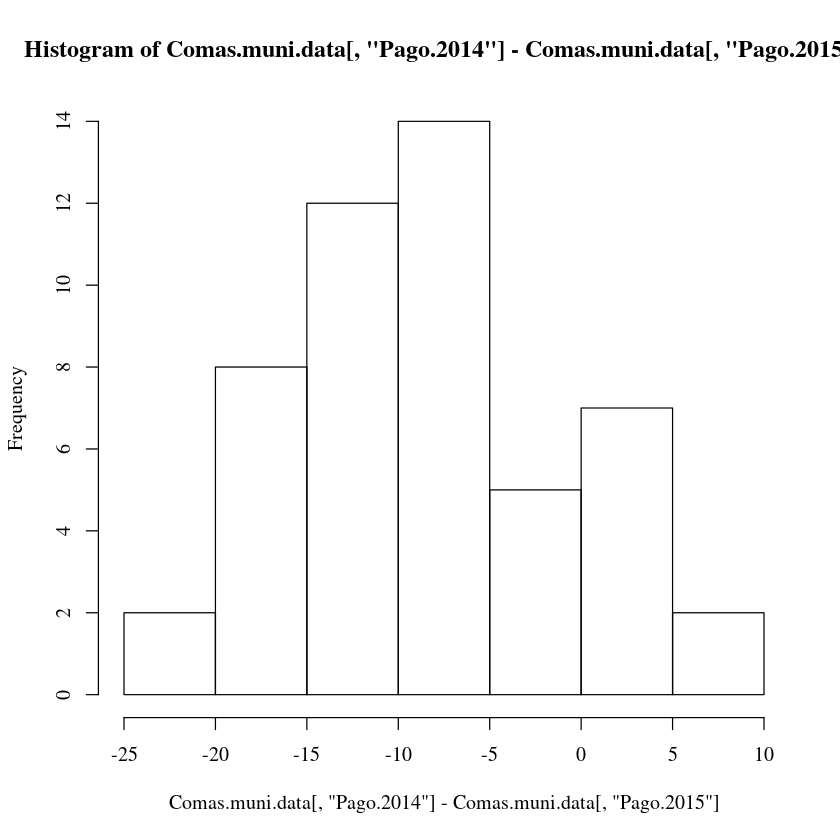

In [16]:
# EL valor 0.224686046539319 es cercano a cero, nos haria pensar que es simetrico
# nos apoyamos en un gráfico de histograma para ver si es simetríco
hist(Comas.muni.data[,"Pago.2014"]-Comas.muni.data[,"Pago.2015"])

In [17]:
###############################################################################
#   Prueba de Simetría

# Cargar las librerias para realizar la prueba de simetria
install.packages("lawstat")
library(lawstat)


also installing the dependencies ‘Kendall’, ‘VGAM’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: Kendall
Loading required package: mvtnorm
Loading required package: VGAM
Loading required package: stats4
Loading required package: splines


In [20]:
# Para que de un resultado unico ponemos boot = F
symmetry.test(Comas.muni.data[,"Pago.2014"]-Comas.muni.data[,"Pago.2015"], boot=F, option="MGG")


	Symmetry test by Miao, Gel, and Gastwirth (2006)

data:  Comas.muni.data[, "Pago.2014"] - Comas.muni.data[, "Pago.2015"]
Test statistic = 1.3663, p-value = 0.1718
alternative hypothesis: the distribution is asymmetric.


In [21]:
# Hipotesis
#
#     1) 
#         HO: As = 0  ( Simétrica)
#         H1: As <> 0  ( No simétrica)
#    
#     2)  alfa = 0.05
#
#     3)  p-value = 0.1718  > alfa , no se rechaza H0
#
#     4)  Conclusión: A un alfa=0.05, no se puede afirmar que la diferencia del pago de impuestos
#                     de los años 2014 y 2015 no es simetrica

In [23]:
###############################################################################
#   Prueba de Wilcoxon

# Cargar las librerias para realizar la prueba de simetria
install.packages("exactRankTests")
library(exactRankTests)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
 Package ‘exactRankTests’ is no longer under development.
 Please consider using package ‘coin’ instead.



In [24]:
# Hipotesis
#
#     1) 
#         HO: Me_2014 = Me_2015    HO: Me = 0
#         H1: Me_2014 <> Me_2015   H1: Me <> 0
#    
#     2)  alfa = 0.05
#
#     3)  p-valor = ?
#
#     4)  Conclusion ......

wilcox.exact(Comas.muni.data[,"Pago.2014"],Comas.muni.data[,"Pago.2015"], mu=0, alternative="t", paired=T)

#     3) Se calcula que p-value = 4.29e-08 < alfa , SE RECHAZA H0
#     4) Conclusión : A un alfa = 0.05 , se puede afirmar que el pago mediano de impuestos 
#                     entre los años 2014 y 2015 es diferente


	Asymptotic Wilcoxon signed rank test

data:  Comas.muni.data[, "Pago.2014"] and Comas.muni.data[, "Pago.2015"]
V = 70, p-value = 4.29e-08
alternative hypothesis: true mu is not equal to 0


In [25]:
# Hipotesis
#
#     1) 
#         HO: Me_2014 - Me_2015 >= 10    HO: Med >= 0
#         H1: Me_2014 - Me_2015 < 10     H1: Med < 0
#    
#     2)  alfa = 0.05
#
#     3)  p-valor = ?
#
#     4)  Conclusion ......

wilcox.exact(Comas.muni.data[,"Pago.2015"],Comas.muni.data[,"Pago.2014"], mu=10, alternative="l", paired=T)

#     3) Se calcula que p-value = 0.1147 < alfa , NO SE RECHAZA H0
#     4) Conclusión : A un alfa = 0.05 , se puede afirmar que el pago mediano de impuestos 
#                     en el año 2015 supera al pago mediano de impuestos del año 2014 en menos de 10 soles


	Asymptotic Wilcoxon signed rank test

data:  Comas.muni.data[, "Pago.2015"] and Comas.muni.data[, "Pago.2014"]
V = 513, p-value = 0.1147
alternative hypothesis: true mu is less than 10


In [26]:
###############################################################################
#
# ENUNCIADO 10.Si la distribución del tiempo que se demora en ser atendido en la
#           municipalidad cuando va a pagar sus impuestos en los distritos de Los
#           Olivos y San Martín de Porras es diferente

###############################################################################
#                        Prueba de Wald Wolfowitzs
###############################################################################

# Cargar las librerias para realizar la prueba de Wald Wolfowitzs
install.packages("DescTools")
library(DescTools)


also installing the dependency ‘expm’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [28]:
# Filtro solo la municipalidad de San Martin de Porras
SMP.muni.data <- subset(Muni.data, Distrito=="San Martín de Porras")

# Filtro solo la municipalidad de Los Olivos
LOL.muni.data <- subset(Muni.data, Distrito=="Los Olivos")

#
RunsTest(SMP.muni.data[,"Atención"], LOL.muni.data[,"Atención"])

Warning message in RunsTest.default(SMP.muni.data[, "Atención"], LOL.muni.data[, :
“cannot compute reliable p-values with inter-group ties between x and y”


	Wald-Wolfowitz Runs Test

data:  SMP.muni.data[, "Atención"] and LOL.muni.data[, "Atención"]
z = -0.93087, runs = 31, m = 40, n = 30, p-value = 0.3519
alternative hypothesis: true number of runs is not equal the expected number


In [29]:
# Hipotesis
#
#     1) 
#         HO: F(Xsmp) = F(Xlol)
#         H1: F(Xsmp) <> F(Xlol)
#    
#     2)  alfa = 0.05
#
#     3)  p-value = 0.3519 > alfa , NO SE RECHAZA H0
#
#     4)  Conclusión: A un alfa = 0.05, no se puede afirmar que la distribución del tiempo de atención de los 
#                     contribuyentes en los distritos de San Martín de los Porres y Los Olivos es diferente


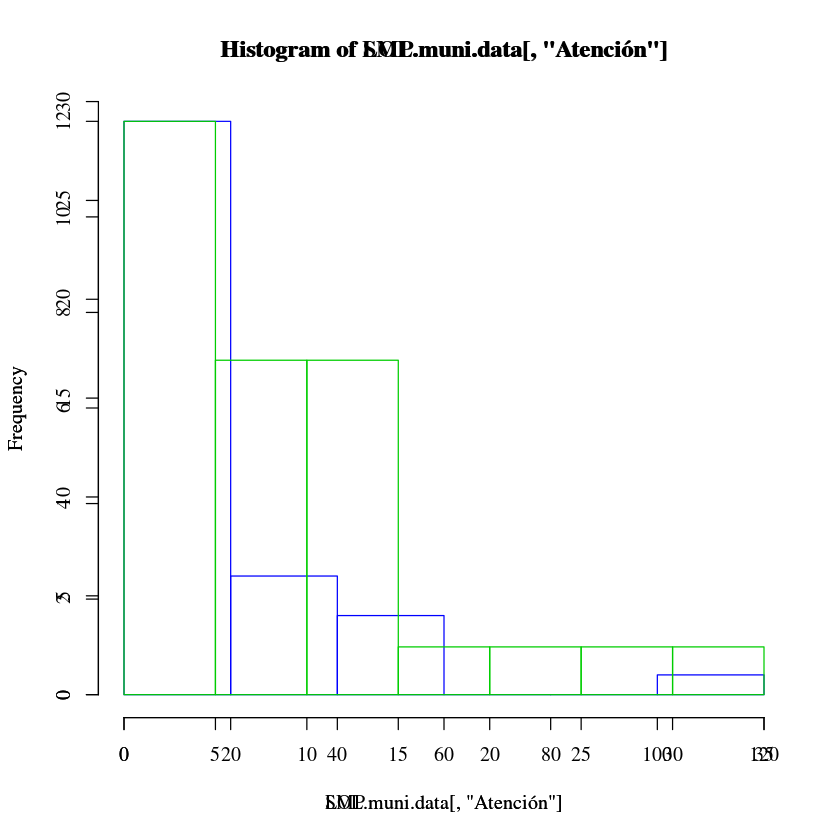

In [34]:
# Realización de los histrogramas
hist(SMP.muni.data[,"Atención"], border = 4)
par(new=T)
hist(LOL.muni.data[,"Atención"], border = 3)